<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-Validation-Test-Split-with-Stratify" data-toc-modified-id="Train-Validation-Test-Split-with-Stratify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train Validation Test Split with Stratify</a></span></li><li><span><a href="#Model:-LightGBM" data-toc-modified-id="Model:-LightGBM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model: LightGBM</a></span></li><li><span><a href="#HPO-Hyper-Parameter-Optimization-with-Optuna" data-toc-modified-id="HPO-Hyper-Parameter-Optimization-with-Optuna-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>HPO Hyper Parameter Optimization with Optuna</a></span></li><li><span><a href="#LightGBM-cross-validation" data-toc-modified-id="LightGBM-cross-validation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>LightGBM cross validation</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Model-interpretation-using-eli5" data-toc-modified-id="Model-interpretation-using-eli5-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Model interpretation using eli5</a></span></li><li><span><a href="#Model-interpretation-using-lime" data-toc-modified-id="Model-interpretation-using-lime-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Model interpretation using lime</a></span></li><li><span><a href="#Model-interpretation-using-shap" data-toc-modified-id="Model-interpretation-using-shap-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Model interpretation using shap</a></span></li></ul></li><li><span><a href="#Time-taken" data-toc-modified-id="Time-taken-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Time taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

The datasets contains transactions made by credit cards in September
2013 by european cardholders.


This dataset presents transactions that occurred in two days,
where we have 492 frauds out of 284,807 transactions. 

The dataset is highly unbalanced, the positive class (frauds)
account for 0.172% of all transactions.

It contains only numerical input variables which are
the result of a PCA transformation.


Unfortunately, due to confidentiality issues,
we cannot provide the original features and 
more background information about the data.


Features V1, V2, ... V28 are the principal
components obtained with PCA,
the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Feature 'Time' contains the seconds elapsed between each transaction
and the first transaction in the dataset. The feature 'Amount'
is the transaction Amount, this feature can be used for 
example-dependant cost-senstive learning. 

Feature 'Class' is the response variable and it takes value
1 in case of fraud and 0 otherwise.

# Imports

In [1]:
import time
time_start_notebook = time.time()

In [2]:
# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bp")
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bp/bhishan")
from bhishan import bp

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED = 0
RNG = np.random.RandomState(SEED)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.options.display.float_format = '{:,}'.format # df.A.value_counts().astype(float)
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

import scipy
from scipy import stats
from scikitplot import metrics as skmetrics

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# dimension reduction for visualization
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# hyperparameters search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# prediction
from sklearn.model_selection import cross_val_predict

# model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# roc auc etc scores
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

# roc auc curves
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# pickle
import six
import joblib

# lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier

# optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

# model evaluation
import shap
import lime
import eli5
import yellowbrick
import scikitplot
import lime.lime_tabular
from eli5.sklearn import PermutationImportance

# plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


Bhishan Poudel 2021-08-08 

CPython 3.7.7
IPython 7.22.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

pandas      1.3.0
json        2.0.9
numpy       1.19.5
lightgbm    2.3.1
eli5        0.10.1
IPython     7.22.0
matplotlib  3.2.1
shap        0.39.0
yellowbrick 1.1
joblib      1.0.1
scikitplot  0.3.7
autopep8    1.5.2
optuna      2.7.0
scipy       1.6.2
sklearn     0.23.1
six         1.15.0
seaborn     0.11.0



In [1]:
# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan/")
from bhishan import bp

# Useful Scripts

In [6]:
def print_scores(ytest,ypreds):
    print(f'Precision: {precision_score(ytest,ypreds): .2f}')
    print(f'Recall   : {recall_score(ytest,ypreds): .2f}')
    print(f'F1-score : {f1_score(ytest,ypreds): .2f}')

    c = classification_report(ytest, ypreds)
    print(c)

    cm = confusion_matrix(ytest,ypreds)
    names = ['Not-converted','Converted']
    df_cm = pd.DataFrame(cm,index=names,columns=names)
    df_cm = df_cm.style.background_gradient()
    display(df_cm)

In [7]:
df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F0.5':[],
                        'F1':[],
                        'F2':[],
                        'AUC':[],
                        'AUCPR':[],
                        'Time Taken': [],
                        'Time Taken Sec': [],
                    })

In [8]:
def get_row_eval(model,model_name,desc,df_eval,
                 df_Xtrain,ser_ytrain,
                 df_Xtest,ser_ytest,
                 kw_fit={},
                 sort='F2',
                 threshold=0.5,
                 average='binary',
                 show=True
                ):
    from sklearn import metrics as skmetrics
    from sklearn import model_selection

    time_start = time.time()
    model.fit(df_Xtrain, ser_ytrain,**kw_fit)

    # cross-validation on train data
    skf = model_selection.StratifiedKFold(n_splits=2,shuffle=True,random_state=SEED)
    trprobs_cv = model_selection.cross_val_predict(model, df_Xtrain, ser_ytrain,
                                   cv=skf,method='predict_proba')
    trprobs1d = trprobs_cv[:,1] # take 2nd column for probability
    trpreds = (trprobs1d>threshold).astype(np.int8)

    ytr = np.array(ser_ytrain).flatten()

    time_taken_sec = time.time() - time_start
    m,s = divmod(time_taken_sec,60)
    time_taken = f"{s:.2f} sec" if not m else f"{m} min {s:.2f} sec"

    prec,rec,thr = sklearn.metrics.precision_recall_curve(ytr,trprobs1d)
    auc_pr = sklearn.metrics.auc(rec,prec)

    row_eval = [model_name,desc, 
                skmetrics.accuracy_score(ytr, trpreds),
                skmetrics.precision_score(ytr, trpreds, average=average,zero_division=0),
                skmetrics.recall_score(ytr, trpreds, average=average,zero_division=0),
                skmetrics.fbeta_score(ytr, trpreds, average=average,beta=0.5,zero_division=0),
                skmetrics.f1_score(ytr, trpreds, average=average,zero_division=0),
                skmetrics.fbeta_score(ytr, trpreds, average=average,beta=2,zero_division=0),
                skmetrics.roc_auc_score(ytr, trprobs1d), # for auc, we need probs
                auc_pr,
                time_taken,
                time_taken_sec
               ]
    
    df_eval.loc[len(df_eval)] = row_eval
    df_eval = df_eval.drop_duplicates(subset=['Model','Description'])
    df_eval = df_eval.sort_values(sort,ascending=False)

    # predict on test data
    yprobs = model.predict_proba(df_Xtest)
    yprobs1d = yprobs[:,1] # take 2nd column element
    ypreds = (yprobs1d>threshold).astype(np.int8)
    ytx = np.array(ser_ytest).flatten()

    if show:
        # df_eval
        display(df_eval)
        
        # confusion matrix
        print(skmetrics.confusion_matrix(ytx, ypreds))
        print(skmetrics.classification_report(ytx,ypreds))

        # feature importance
        fig,ax = plt.subplots(figsize=(12,8))
        lgb.plot_importance(model,ax=ax)
        plt.show()

    return df_eval,ypreds,yprobs1d

# Load the data

In [9]:
df = pd.read_csv('../data/raw/creditcard.csv.zip',compression='zip')
print(df.shape)
df.head()

(284807, 31)


Time                 V1                  V2               V3  \
0   0.0   -1.3598071336738 -0.0727811733098497 2.53634673796914   
1   0.0   1.19185711131486    0.26615071205963 0.16648011335321   
2   1.0  -1.35835406159823   -1.34016307473609 1.77320934263119   
3   1.0 -0.966271711572087  -0.185226008082898 1.79299333957872   
4   2.0  -1.15823309349523   0.877736754848451   1.548717846511   

                  V4                  V5                  V6  \
0   1.37815522427443  -0.338320769942518   0.462387777762292   
1  0.448154078460911  0.0600176492822243 -0.0823608088155687   
2  0.379779593034328  -0.503198133318193    1.80049938079263   
3 -0.863291275036453 -0.0103088796030823    1.24720316752486   
4  0.403033933955121  -0.407193377311653  0.0959214624684256   

                   V7                 V8                 V9  \
0   0.239598554061257 0.0986979012610507  0.363786969611213   
1 -0.0788029833323113 0.0851016549148104 -0.255425128109186   
2   0.791460956450422  0.247675786588991  -1.51465432260583   
3    0.23760893977178  0.377435874652262  -1.38702406270197   
4   0.592940745385545 -0.270532677192282  0.817739308235294   

                  V10                V11                V12  \
0  0.0907941719789316 -0.551599533260813 -0.617800855762348   
1  -0.166974414004614   1.61272666105479   1.06523531137287   
2   0.207642865216696  0.624501459424895  0.066083685268831   
3 -0.0549519224713749 -0.226487263835401  0.178228225877303   
4   0.753074431976354 -0.822842877946363   0.53819555014995   

                 V13                V14                V15                V16  \
0 -0.991389847235408 -0.311169353699879   1.46817697209427 -0.470400525259478   
1   0.48909501589608 -0.143772296441519  0.635558093258208  0.463917041022171   
2  0.717292731410831 -0.165945922763554   2.34586494901581  -2.89008319444231   
3  0.507756869957169  -0.28792374549456 -0.631418117709045   -1.0596472454325   
4    1.3458515932154  -1.11966983471731  0.175121130008994 -0.451449182813529   

                 V17                 V18                V19  \
0  0.207971241929242  0.0257905801985591  0.403992960255733   
1 -0.114804663102346  -0.183361270123994 -0.145783041325259   
2   1.10996937869599  -0.121359313195888  -2.26185709530414   
3 -0.684092786345479    1.96577500349538   -1.2326219700892   
4 -0.237033239362776 -0.0381947870352842  0.803486924960175   

                  V20                 V21                V22  \
0   0.251412098239705  -0.018306777944153  0.277837575558899   
1 -0.0690831352230203  -0.225775248033138 -0.638671952771851   
2   0.524979725224404   0.247998153469754  0.771679401917229   
3  -0.208037781160366  -0.108300452035545 0.0052735967825345   
4   0.408542360392758 -0.0094306971323291   0.79827849458971   

                 V23                V24                V25                V26  \
0 -0.110473910188767 0.0669280749146731  0.128539358273528 -0.189114843888824   
1  0.101288021253234 -0.339846475529127  0.167170404418143  0.125894532368176   
2  0.909412262347719 -0.689280956490685 -0.327641833735251 -0.139096571514147   
3 -0.190320518742841  -1.17557533186321  0.647376034602038 -0.221928844458407   
4 -0.137458079619063  0.141266983824769 -0.206009587619756  0.502292224181569   

                  V27                 V28  Amount  Class  
0   0.133558376740387 -0.0210530534538215  149.62      0  
1 -0.0089830991432281  0.0147241691924927    2.69      0  
2 -0.0553527940384261 -0.0597518405929204  378.66      0  
3  0.0627228487293033  0.0614576285006353   123.5      0  
4   0.219422229513348   0.215153147499206   69.99      0

# Train Validation Test Split with Stratify

In [10]:
from sklearn.model_selection import train_test_split

target = 'Class'
df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

In [11]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)

print(df_Xtrain.shape)
df_Xtrain.head()

(182276, 30)


Time                V1                  V2                V3  \
138257  82,565.0  1.11859127825998   0.562708615614581 0.569628132172694   
60033   49,125.0  1.17068622428586  0.0837586462868538 0.466278464687971   
31064   36,195.0  1.07290244801688 -0.0151657747657395 0.942250546807478   
245706 152,869.0  2.13690895693366  0.0886462179481961 -2.49091417482061   
25871   33,805.0 -2.44837759416049   -1.33550776962431  1.24043086970596   

                      V4                  V5                 V6  \
138257  2.98749567105308  -0.365594117191008  -0.53178891607535   
60033  0.913911105187985 -0.0931233280534145  0.427588359510079   
31064   1.33063117887976  -0.580474206203662  0.206234895815589   
245706 0.098321044575947   0.789008357338609  -1.39958230925586   
25871   1.80006772150734   0.383084074600485 -0.501159877615605   

                        V7                 V8                 V9  \
138257 -0.0441441249518224 0.0119318115692382 -0.129131427848726   
60033   -0.372726903094763  0.312776807324368  0.129610439285404   
31064   -0.402120891949741   0.31313297852691  0.410088272599882   
245706   0.854902018700341 -0.492911714525658 -0.254999494950959   
25871     1.08040956757211  -0.60409287158821  -0.31945786831444   

                      V10                V11                V12  \
138257 0.0849081565743621 -0.540333553184882 -0.405535179178872   
60033   0.188107405142176  0.707980369024214 0.0252122485980969   
31064  0.0282224315408947   1.18250930627367   0.70922235548697   
245706  0.423266663587826  0.537589579310604  0.359201388101551   
25871   0.284933549468543   0.22803039313114 -0.109462552980001   

                      V13                V14                V15  \
138257  -1.12449319662053  -1.11871638400226 -0.708344083228945   
60033   -1.34149123316402  0.695830794891532  0.890825865939713   
31064   -1.40543311438519  0.361666199556206 -0.448324601820023   
245706 -0.881515243202571   1.13338807834543 -0.852639540534027   
25871  0.0449303122994679 0.0313506514415897   1.81120324676505   

                      V16                V17                 V18  \
138257  0.403484521999855   0.89014513354152 -0.0253850527776957   
60033   0.588590292849305 -0.703942987135041   0.247762788136479   
31064  -0.221590911055599 0.0443126891037833  -0.438542146969058   
245706 -0.472625411623177 -0.395754373135845 -0.0803761218444183   
25871  -0.586386626989747  0.126218727182111  -0.420907177328929   

                      V19                V20                V21  \
138257 -0.901995325192936  -0.20418403655852 -0.128269305733937   
60033  -0.221214803414507 -0.226078189691347 -0.176120706455713   
31064  -0.139385167074192 -0.251464432725128 -0.261719672080143   
245706  0.509355447065211 -0.266382528240024  0.278034370432688   
25871   0.315894920729687  -0.72057196499151 -0.121319219568584   

                      V22                 V23                V24  \
138257 -0.218874505626759 -0.0488163716577826  0.617265327928864   
60033  -0.584725605022912  0.0660507633953362 -0.746666958902139   
31064   -0.66572466761628    0.16753475404378   0.16381522977874   
245706  0.934892042875776  -0.211838843107761 -0.234265525688845   
25871   0.625540529504405  -0.639100480803456  0.522531746694956   

                       V25                V26                V27  \
138257   0.551383852992399 0.0602202164704386 0.0161364657843415   
60033    0.232641206443977 -0.547740351492877 0.0380595170058819   
31064    0.192246899637426 -0.620974380092519 0.0506094503879474   
245706   0.609699115232944    1.0208984195809 -0.154426894059047   
25871  -0.0738009695488949  -0.16278758737067  0.294911791393001   

                      V28  Amount  
138257 0.0471004238374625     7.6  
60033  0.0109949773040646     3.9  
31064  0.0191811160182732     9.9  
245706 -0.112532032632011     2.0  
25871   -0.21122240075315   411.1

In [12]:
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()

# Model: LightGBM
```python
n_jobs=-1
random_state=None

learning_rate
max_depth
min_child_samples

reg_alpha
reg_lambda
subsample

min_child_weight
min_split_gain
n_estimators

num_leaves
objective
boost='gbdt'
metric='auc'
```

Model Description           Accuracy           Precision  \
0  lightgbm     default 0.9957778314204833 0.19851380042462846   

              Recall                F0.5                  F1  \
0 0.4746192893401015 0.22465160980297938 0.27994011976047906   

                   F2                AUC              AUCPR Time Taken  \
0 0.37132644956314537 0.6490154615105698 0.2980270352246768   9.46 sec   

     Time Taken Sec  
0 9.460867166519165

[[56758   106]
 [   36    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.63      0.47        98

    accuracy                           1.00     56962
   macro avg       0.68      0.82      0.73     56962
weighted avg       1.00      1.00      1.00     56962



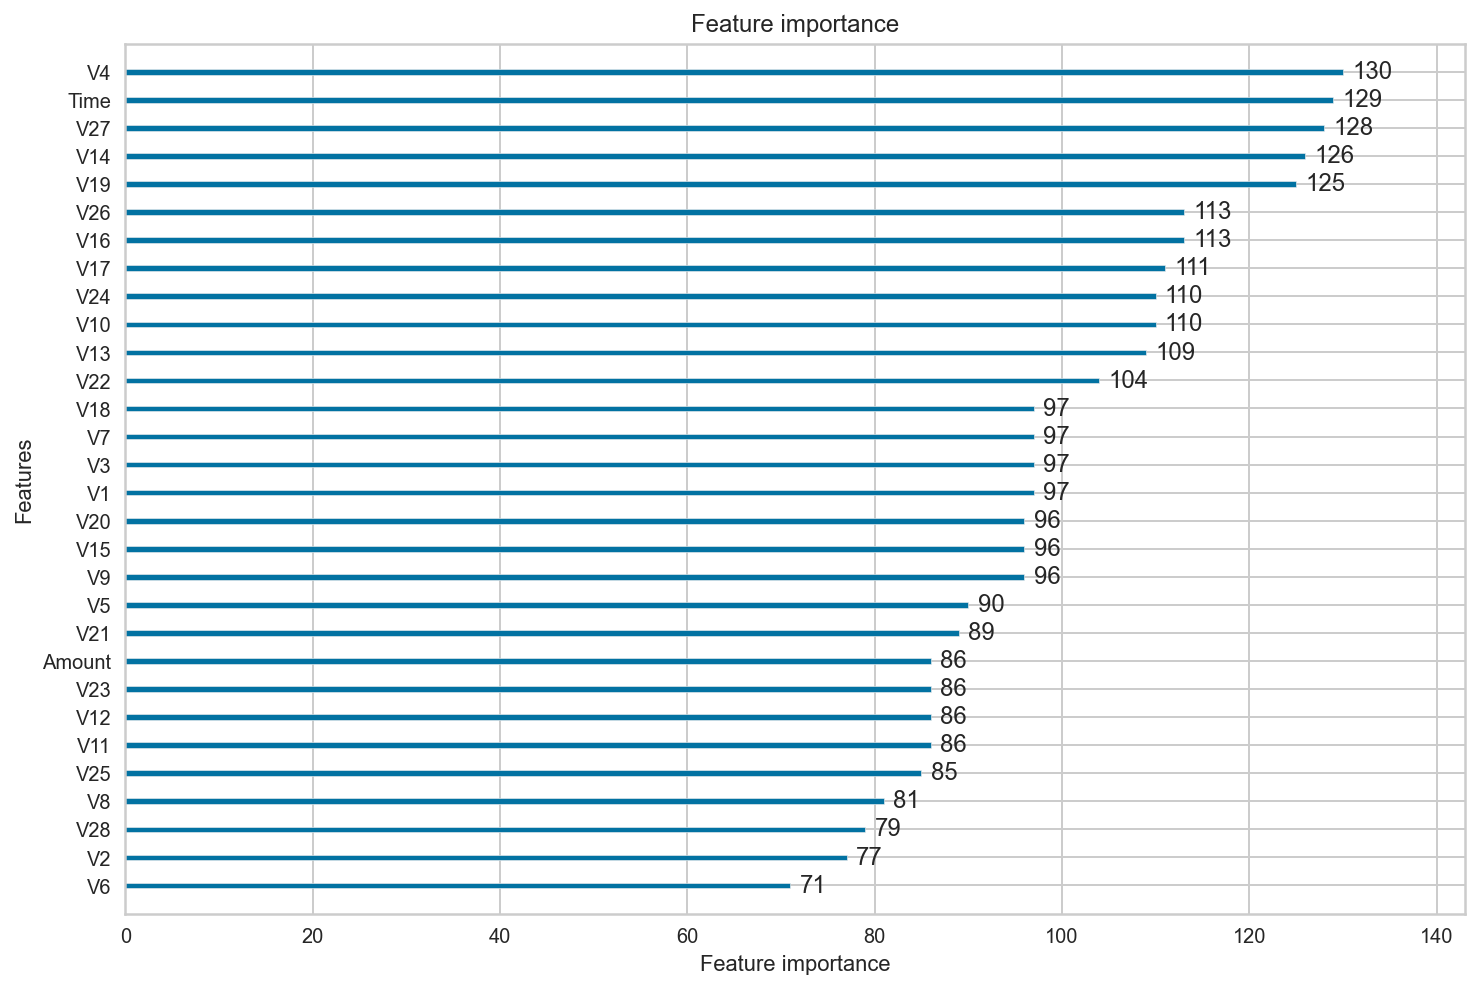

In [13]:
# model
model = lgb.LGBMClassifier(random_state=SEED)

model_name = 'lightgbm'
desc = 'default'
df_eval,ypreds,yprobs = get_row_eval(model,model_name,desc,df_eval,Xtr,ytr,Xtx,ytx)

In [14]:
print_scores(ytx,ypreds)

Precision:  0.37
Recall   :  0.63
F1-score :  0.47
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.63      0.47        98

    accuracy                           1.00     56962
   macro avg       0.68      0.82      0.73     56962
weighted avg       1.00      1.00      1.00     56962



# HPO Hyper Parameter Optimization with Optuna

In [15]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

dtrain = lgb.Dataset(df_Xtrain, label= ser_ytrain)

def objective(trial):
    params_lgb_optuna = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbose': 0,
        'boosting_type': 'gbdt',
        # lambda
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        # leaves
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        # fraction
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.2, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        # child
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1e4),
    }

    booster_gbm = lgb.train(params_lgb_optuna, dtrain)
    
    vdprobs1d = booster_gbm.predict(df_Xvalid)
    #vdpreds = np.rint(vdprobs1d)
    threshold = 0.5
    vdpreds = (vdprobs1d > threshold).astype(np.int8)

    score = roc_auc_score(ser_yvalid.to_numpy().ravel(),vdprobs1d)
    return score

In [16]:
booster_gbm = lgb.train({'objective': 'binary','metric': 'binary_logloss'}, dtrain)

In [17]:
bp.show_methods(booster_gbm)

0                          1                    2
0            add_valid               free_network               params
1                 attr            get_leaf_output              predict
2       best_iteration  get_split_value_histogram                refit
3           best_score                     handle      reset_parameter
4    current_iteration          model_from_string    rollback_one_iter
5           dump_model            model_to_string           save_model
6                 eval            name_valid_sets             set_attr
7           eval_train                    network          set_network
8           eval_valid                num_feature  set_train_data_name
9   feature_importance    num_model_per_iteration       shuffle_models
10        feature_name                  num_trees               update
11        free_dataset         pandas_categorical

In [18]:
vdprobs1d = booster_gbm.predict(df_Xvalid)
threshold = 0.5
ypreds = (vdprobs1d > threshold).astype(np.int8)
sum(ypreds)

185

In [19]:
# NOTE: there is inherent non-determinism in optuna hyperparameter selection
#       we may not get the same hyperparameters when run twice.

sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 10 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='lgb_optuna',
                            storage='sqlite:///lgb_optuna_fraud_detection.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

In [20]:
# Resume from last study
N_TRIALS = 10 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='lgb_optuna',
                            storage='sqlite:///lgb_optuna_fraud_detection.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

In [21]:
print(f'Number of finished trials: {len(study.trials)}')

# best trail
best_trial = study.best_trial

# best params
params_best = study.best_trial.params
params_best

Number of finished trials: 40


{'bagging_fraction': 0.6266899190322015,
 'bagging_freq': 3,
 'feature_fraction': 0.5548995142094996,
 'lambda_l1': 1.8249263636220374e-08,
 'lambda_l2': 0.0005661533776262685,
 'min_child_samples': 31,
 'min_child_weight': 5.529010386703527,
 'num_leaves': 147,
 'subsample': 0.7093293548765993}

Model         Description           Accuracy           Precision  \
1  lightgbm  grid search optuna 0.9994513814215804  0.8944281524926686   
0  lightgbm             default 0.9957778314204833 0.19851380042462846   

              Recall                F0.5                  F1  \
1 0.7741116751269036  0.8674630261660977  0.8299319727891157   
0 0.4746192893401015 0.22465160980297938 0.27994011976047906   

                   F2                AUC              AUCPR Time Taken  \
1  0.7955138236828377 0.9747168057416373 0.8329147728927615   5.85 sec   
0 0.37132644956314537 0.6490154615105698 0.2980270352246768   9.46 sec   

     Time Taken Sec  
1 5.851884126663208  
0 9.460867166519165

[[56857     7]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.76      0.83        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



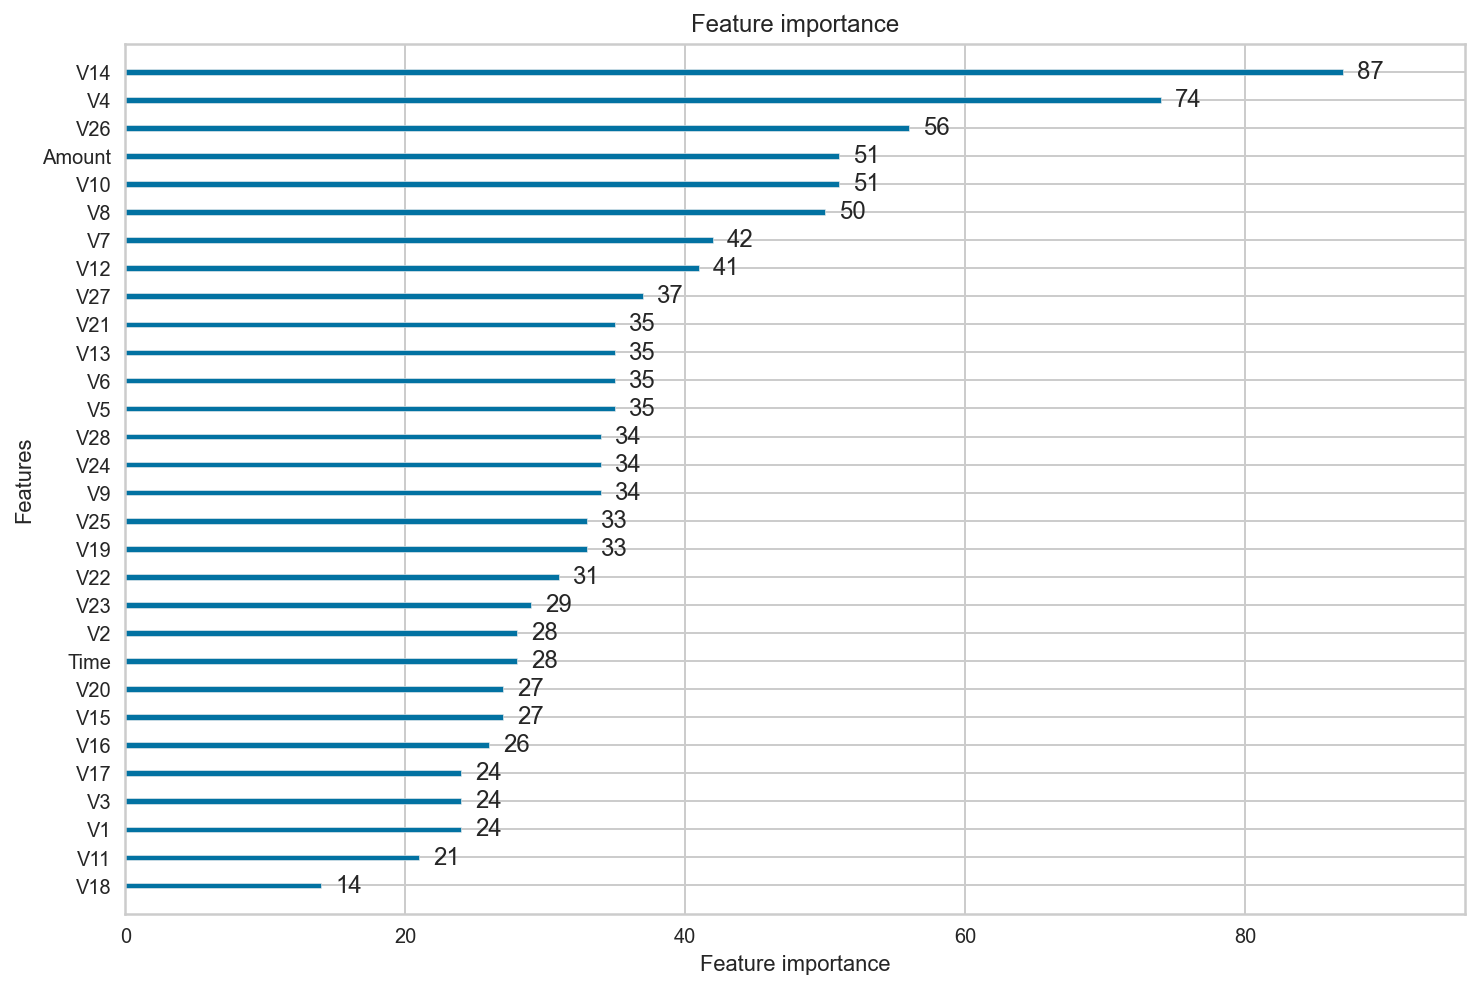

In [22]:
# time
time_start = time.time()

model_name = 'lightgbm'
desc = 'grid search optuna'

# use best model
params_best =  study.best_trial.params

model = lgb.LGBMClassifier(random_state=SEED)
model.set_params(**params_best)

df_eval,ypreds,yprobs = get_row_eval(model,model_name,desc,df_eval,Xtr,ytr,Xtx,ytx)

# LightGBM cross validation

In [23]:
%%time

X = df.drop('Class',axis=1).to_numpy()
y = df['Class'].to_numpy()

model = lgb.LGBMClassifier(random_state=SEED)
model.set_params(**params_best)

model.fit(Xtr,ytr)

scores = cross_val_score(model,
                         X,y,
                         scoring ='f1',
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 7.38 s, sys: 452 ms, total: 7.83 s
Wall time: 15.8 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s finished


In [24]:
trace = go.Table(
    header=dict(values=['<b>F1 score mean<b>', '<b>F1 score std<b>'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['center'],
                font = dict(size = 15)),
    cells=dict(values=[np.round(scores.mean(),6),
                       np.round(scores.std(),6)],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['center'], font = dict(size = 15)))

layout = dict(width=800, height=500,
              title = 'Cross validation - 5 folds [F1 score]',
              font = dict(size = 15))
fig = dict(data=[trace], layout=layout)
py.iplot(fig, filename = '../reports/figures/lightgbm_cross_validation.html')

# Model Interpretation

In [25]:
df.head(2)

Time               V1                  V2               V3  \
0   0.0 -1.3598071336738 -0.0727811733098497 2.53634673796914   
1   0.0 1.19185711131486    0.26615071205963 0.16648011335321   

                 V4                 V5                  V6  \
0  1.37815522427443 -0.338320769942518   0.462387777762292   
1 0.448154078460911 0.0600176492822243 -0.0823608088155687   

                   V7                 V8                 V9  \
0   0.239598554061257 0.0986979012610507  0.363786969611213   
1 -0.0788029833323113 0.0851016549148104 -0.255425128109186   

                 V10                V11                V12                V13  \
0 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408   
1 -0.166974414004614   1.61272666105479   1.06523531137287   0.48909501589608   

                 V14               V15                V16                V17  \
0 -0.311169353699879  1.46817697209427 -0.470400525259478  0.207971241929242   
1 -0.143772296441519 0.635558093258208  0.463917041022171 -0.114804663102346   

                 V18                V19                 V20  \
0 0.0257905801985591  0.403992960255733   0.251412098239705   
1 -0.183361270123994 -0.145783041325259 -0.0690831352230203   

                 V21                V22                V23                V24  \
0 -0.018306777944153  0.277837575558899 -0.110473910188767 0.0669280749146731   
1 -0.225775248033138 -0.638671952771851  0.101288021253234 -0.339846475529127   

                V25                V26                 V27  \
0 0.128539358273528 -0.189114843888824   0.133558376740387   
1 0.167170404418143  0.125894532368176 -0.0089830991432281   

                  V28  Amount  Class  
0 -0.0210530534538215  149.62      0  
1  0.0147241691924927    2.69      0

## Model interpretation using eli5

In [26]:
import eli5

eli5.show_weights(model)

In [27]:
from eli5.sklearn import PermutationImportance

feature_names = df_Xtrain.columns.tolist()
perm = PermutationImportance(model).fit(df_Xtest, ytx)
eli5.show_weights(perm, feature_names=feature_names)

## Model interpretation using lime

In [28]:
df.head(2)

Time               V1                  V2               V3  \
0   0.0 -1.3598071336738 -0.0727811733098497 2.53634673796914   
1   0.0 1.19185711131486    0.26615071205963 0.16648011335321   

                 V4                 V5                  V6  \
0  1.37815522427443 -0.338320769942518   0.462387777762292   
1 0.448154078460911 0.0600176492822243 -0.0823608088155687   

                   V7                 V8                 V9  \
0   0.239598554061257 0.0986979012610507  0.363786969611213   
1 -0.0788029833323113 0.0851016549148104 -0.255425128109186   

                 V10                V11                V12                V13  \
0 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408   
1 -0.166974414004614   1.61272666105479   1.06523531137287   0.48909501589608   

                 V14               V15                V16                V17  \
0 -0.311169353699879  1.46817697209427 -0.470400525259478  0.207971241929242   
1 -0.143772296441519 0.635558093258208  0.463917041022171 -0.114804663102346   

                 V18                V19                 V20  \
0 0.0257905801985591  0.403992960255733   0.251412098239705   
1 -0.183361270123994 -0.145783041325259 -0.0690831352230203   

                 V21                V22                V23                V24  \
0 -0.018306777944153  0.277837575558899 -0.110473910188767 0.0669280749146731   
1 -0.225775248033138 -0.638671952771851  0.101288021253234 -0.339846475529127   

                V25                V26                 V27  \
0 0.128539358273528 -0.189114843888824   0.133558376740387   
1 0.167170404418143  0.125894532368176 -0.0089830991432281   

                  V28  Amount  Class  
0 -0.0210530534538215  149.62      0  
1  0.0147241691924927    2.69      0

In [29]:
idx = 0
example = df_Xtest.iloc[idx]
answer = ser_ytest.iloc[idx]
feature_names = df_Xtest.columns.tolist()

prediction = model.predict(example.to_numpy().reshape(-1,1).T)


print(f'answer     = {answer}')
print('prediction = ', prediction[0])
print()
print(example)
print(feature_names)

answer     = 0
prediction =  0

Time               113,050.0
V1         0.114697289499555
V2         0.796303316904746
V3        -0.149552970484065
V4        -0.823010911929308
V5         0.878762929901124
V6        -0.553151668076057
V7         0.939258608931089
V8        -0.108502082160203
V9          0.11113713552423
V10       -0.390521089642943
V11        -1.94954563276141
V12       -0.494436160725985
V13       -0.353696342510452
V14        0.158729133570328
V15       -0.267238817560267
V16        0.234802455099954
V17        -0.75493606804519
V18       -0.343012138433526
V19        0.312174599857807
V20      -0.0427111647779897
V21       -0.335776322866296
V22       -0.807853023303226
V23      -0.0559403173868963
V24        -1.02528148104425
V25        -0.36955723229602
V26        0.204653108226638
V27        0.242724346894465
V28       0.0857125564092851
Amount                  0.89
Name: 159949, dtype: float64
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',

Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.


In [30]:
import lime
import lime.lime_tabular

# categorical_features = []
# categorical_features_idx = [df_Xtrain.columns.get_loc(col) 
#                               for col in categorical_features]

NUM_FEATURES = len(feature_names)
explainer = lime.lime_tabular.LimeTabularExplainer(df_Xtrain.to_numpy(), 
               feature_names=feature_names, 
               class_names=['Not-fraud','Fraud'], 
               mode='classification')

exp = explainer.explain_instance(example, model.predict_proba,
                                 num_features=NUM_FEATURES)
exp.show_in_notebook(show_table=True)

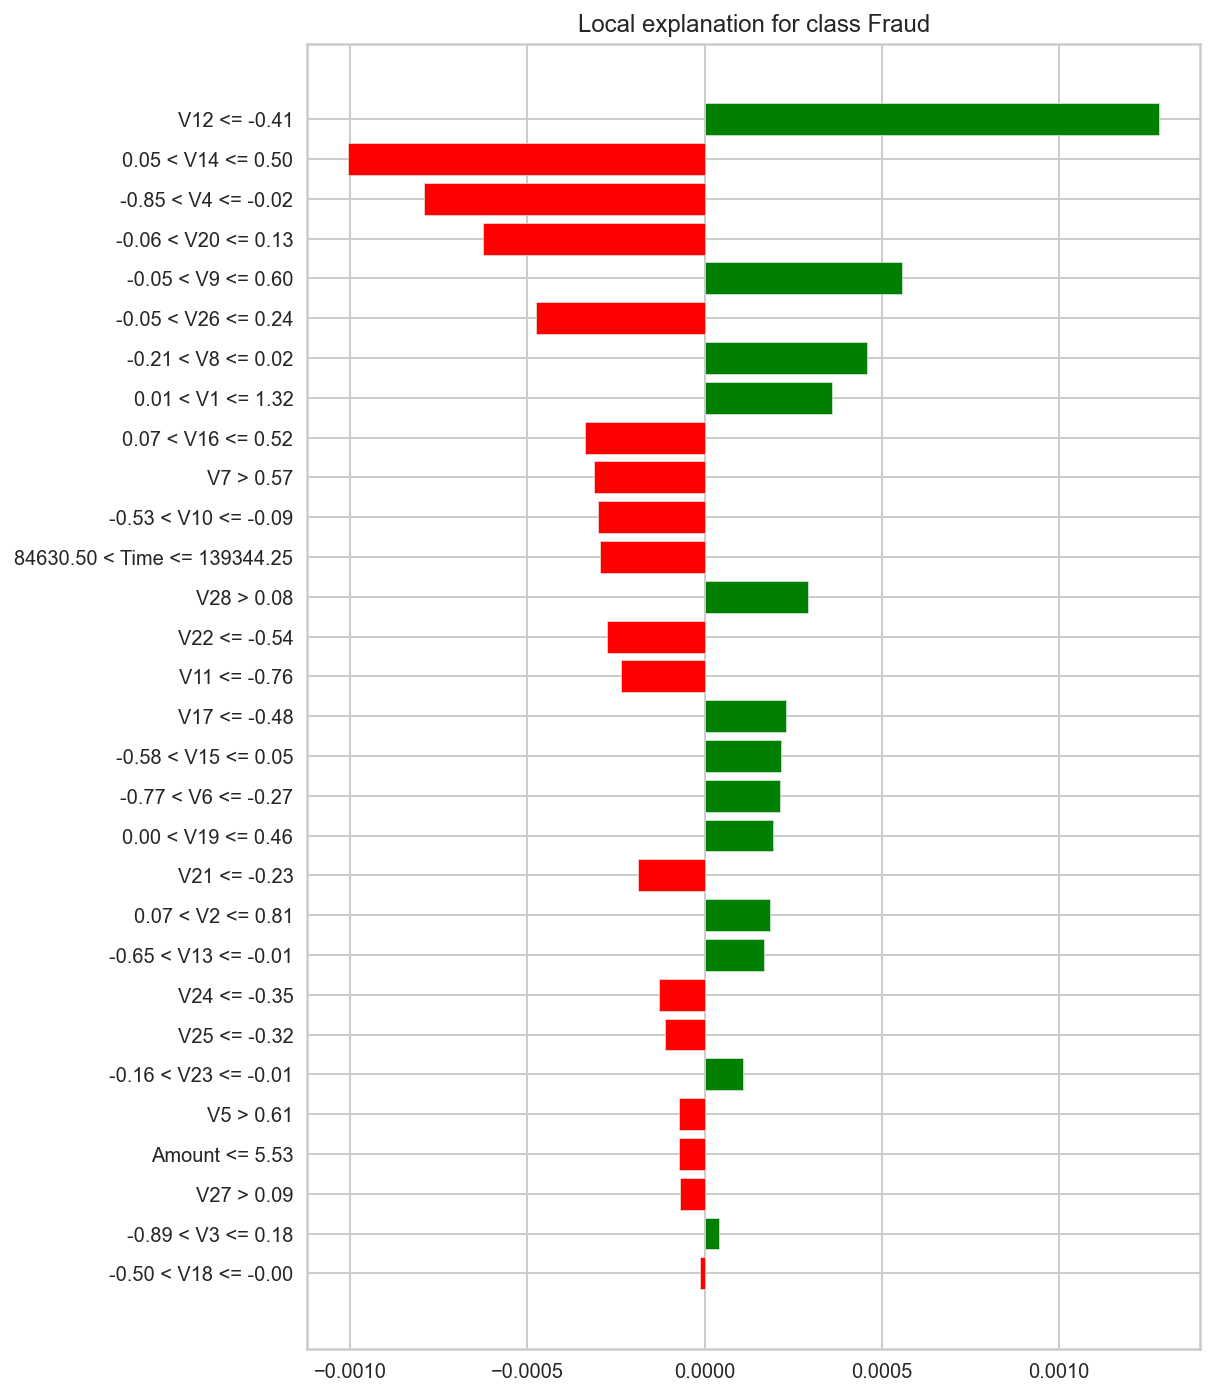

In [31]:
ax = exp.as_pyplot_figure(); # use semicolon
ax.set_figheight(12);

In [32]:
# show_method_attributes(ax,start='set')

## Model interpretation using shap
- [github link](https://github.com/slundberg/shap)
- [shap tutorial for ligtgbm](https://slundberg.github.io/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20LightGBM.html)

In [33]:
import shap

shap.initjs()

In [34]:
show_method_attributes(shap)

Object Type: <class 'module'>



0                     1                         2  \
0    ActionOptimizer     GradientExplainer                   actions   
1  AdditiveExplainer       KernelExplainer  approximate_interactions   
2            Cohorts       LinearExplainer                  bar_plot   
3      DeepExplainer    PartitionExplainer                  datasets   
4          Explainer  PermutationExplainer             decision_plot   
5        Explanation     SamplingExplainer           dependence_plot   
6   GPUTreeExplainer         TreeExplainer            embedding_plot   

                       3                4                          5  \
0             explainers           kmeans  multioutput_decision_plot   
1             force_plot            links                      other   
2                  getjs          maskers    partial_dependence_plot   
3  group_difference_plot       matplotlib                      plots   
4        have_matplotlib           models                     sample   
5             image_plot  monitoring_plot                  save_html   
6                 initjs                                               

                6  
0    summary_plot  
1       text_plot  
2     unsupported  
3           utils  
4        warnings  
5  waterfall_plot  
6

In [35]:
%%time

explainer = shap.TreeExplainer(model)
shap_values = np.array(explainer.shap_values(df_Xtest))

CPU times: user 14.2 s, sys: 91.7 ms, total: 14.3 s
Wall time: 4.68 s


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [36]:
# shap.force_plot?

In [37]:
df_Xtest.shape, explainer.expected_value, type(explainer.expected_value), len(explainer.expected_value)

((56962, 30), [9.904950042902943, -9.904950042902943], list, 2)

In [38]:
idx = 5
shap.force_plot(explainer.expected_value[1],
                shap_values[1][idx,:],
                df_Xtest.iloc[idx,:] # this is just for giving feature names
               )

In [39]:
# many points
NUM = 1000
shap.force_plot(explainer.expected_value[1],
                shap_values[1][:NUM,:],
                df_Xtest.iloc[:NUM,:] # this is just for giving feature names
               )

# Time taken

In [40]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 2 min 30 secs
